In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [23]:
season = 'summer'
list_year = ['2020', '2021']
len_year = len(list_year)

In [33]:
if season == 'summer':
    list_month = ['01', '02', '12']
elif season == 'autumn':
    list_month = ['03', '04', '05']
elif season == 'winter':
    list_month = ['06', '07', '08']
elif season == 'spring':
    list_month = ['09', '10', '11']

print(f'Season: {season}')

Season: summer


In [34]:
a = 0
for yy in list_year:
    print(f'Year: {yy}')

    for mm in list_month:
        print(f'  Index: {a} - Month: {mm} - /IMERG_{yy}_{mm}_01x01_daily.nc')
        file_in = '/mnt/Data/Data/IMERG/Daily_01x01/'+ season +'/IMERG_' + yy +'_'+ mm + '_01x01_daily.nc'

        if a == 0:
            tmp = ca.read_netcdf(file_in,0)
            lat = tmp['lat']
            lon = tmp['lon']

            nlat = len(lat)
            nlon = len(lon)

            lon2d, lat2d = np.meshgrid(lon, lat)

            month_mean = np.zeros([3*len_year, nlat, nlon])

        tmp = ca.read_netcdf(file_in,0)
        month_mean[a,:,:] = np.mean(tmp['prec'].data,axis=0)

        a = a + 1

    print()

Year: 2020
  Index: 0 - Month: 01 - /IMERG_2020_01_01x01_daily.nc
  Index: 1 - Month: 02 - /IMERG_2020_02_01x01_daily.nc
  Index: 2 - Month: 12 - /IMERG_2020_12_01x01_daily.nc

Year: 2021
  Index: 3 - Month: 01 - /IMERG_2021_01_01x01_daily.nc
  Index: 4 - Month: 02 - /IMERG_2021_02_01x01_daily.nc
  Index: 5 - Month: 12 - /IMERG_2021_12_01x01_daily.nc



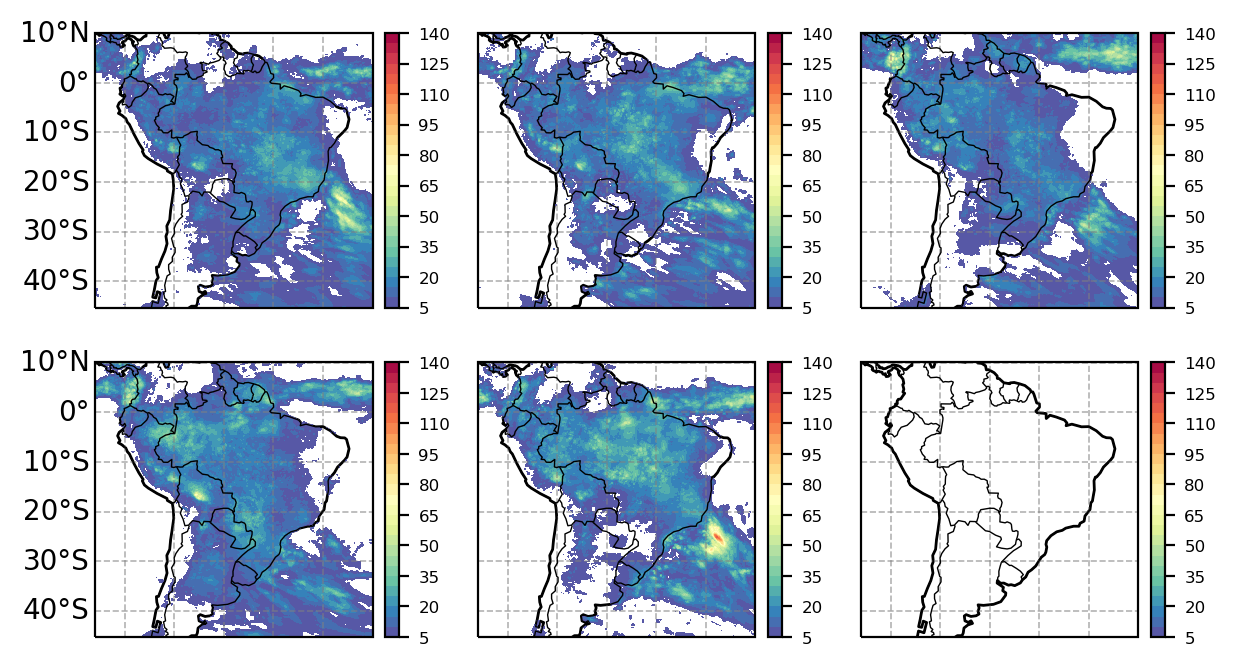

In [35]:
levels = np.arange(5,145,5)

cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(2,3)

#==============================================================================================================
#==============================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,month_mean[0,:,:],cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,month_mean[1,:,:],cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)

ax3 = plt.subplot(gs[0, 2], projection = proj)
ax3.coastlines()
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax3.set_extent([-86,-30,-42,9])
a3 = ax3.contourf(lon2d,lat2d,month_mean[2,:,:],cmap=cmap,levels=levels)
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
cbar3 = plt.colorbar(a3,fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=6)

#==============================================================================================================
#==============================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,month_mean[3,:,:],cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,month_mean[4,:,:],cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)

ax3 = plt.subplot(gs[1, 2], projection = proj)
ax3.coastlines()
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax3.set_extent([-86,-30,-42,9])
a3 = ax3.contourf(lon2d,lat2d,month_mean[5,:,:],cmap=cmap,levels=levels)
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
cbar3 = plt.colorbar(a3,fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=6)

In [16]:
# levels = None
# cmap = plt.cm.Spectral_r

# proj = ccrs.PlateCarree()

# fig = plt.figure(figsize=(8,8),dpi=150)
# gs = gridspec.GridSpec(3,3)

# #==============================================================================================================
# #==============================================================================================================
# ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.coastlines()
# ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax1.set_extent([-86,-30,-42,9])
# a1 = ax1.contourf(lon2d,lat2d,month_mean[0,:,:],cmap=cmap,levels=levels)
# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = True
# gl.right_labels = False
# cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
# cbar1.ax.tick_params(labelsize=6)

# ax2 = plt.subplot(gs[0, 1], projection = proj)
# ax2.coastlines()
# ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax2.set_extent([-86,-30,-42,9])
# a2 = ax2.contourf(lon2d,lat2d,month_mean[1,:,:],cmap=cmap,levels=levels)
# gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
# cbar2.ax.tick_params(labelsize=6)

# ax3 = plt.subplot(gs[0, 2], projection = proj)
# ax3.coastlines()
# ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax3.set_extent([-86,-30,-42,9])
# a3 = ax3.contourf(lon2d,lat2d,month_mean[a,:,:],cmap=cmap,levels=levels)
# gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar3 = plt.colorbar(a3,fraction=0.046, pad=0.04)
# cbar3.ax.tick_params(labelsize=6)

# #==============================================================================================================
# #==============================================================================================================
# ax4 = plt.subplot(gs[1, 0], projection = proj)
# ax4.coastlines()
# ax4.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax4.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax4.set_extent([-86,-30,-42,9])
# a4 = ax4.contourf(lon2d,lat2d,prec_mean[3,:,:],cmap=cmap,levels=levels)
# gl = ax4.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = True
# gl.right_labels = False
# cbar4 = plt.colorbar(a4,fraction=0.046, pad=0.04)
# cbar4.ax.tick_params(labelsize=6)

# ax5 = plt.subplot(gs[1, 1], projection = proj)
# ax5.coastlines()
# ax5.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax5.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax5.set_extent([-86,-30,-42,9])
# a5 = ax5.contourf(lon2d,lat2d,prec_mean[4,:,:],cmap=cmap,levels=levels)
# gl = ax5.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar5 = plt.colorbar(a5,fraction=0.046, pad=0.04)
# cbar5.ax.tick_params(labelsize=6)

# ax6 = plt.subplot(gs[1, 2], projection = proj)
# ax6.coastlines()
# ax6.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax6.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax6.set_extent([-86,-30,-42,9])
# a6 = ax6.contourf(lon2d,lat2d,prec_mean[5,:,:],cmap=cmap,levels=levels)
# gl = ax6.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar6 = plt.colorbar(a6,fraction=0.046, pad=0.04)
# cbar6.ax.tick_params(labelsize=6)

# #==============================================================================================================
# #==============================================================================================================
# ax7 = plt.subplot(gs[2, 0], projection = proj)
# ax7.coastlines()
# ax7.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax7.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax7.set_extent([-86,-30,-42,9])
# a7 = ax7.contourf(lon2d,lat2d,prec_mean[6,:,:],cmap=cmap,levels=levels)
# gl = ax7.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = True
# gl.right_labels = False
# cbar7 = plt.colorbar(a7,fraction=0.046, pad=0.04)
# cbar7.ax.tick_params(labelsize=6)

# ax8 = plt.subplot(gs[2, 1], projection = proj)
# ax8.coastlines()
# ax8.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax8.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax8.set_extent([-86,-30,-42,9])
# a8 = ax8.contourf(lon2d,lat2d,prec_mean[7,:,:],cmap=cmap,levels=levels)
# gl = ax8.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar8 = plt.colorbar(a8,fraction=0.046, pad=0.04)
# cbar8.ax.tick_params(labelsize=6)

# ax9 = plt.subplot(gs[2, 2], projection = proj)
# ax9.coastlines()
# ax9.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
# ax9.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
# ax9.set_extent([-86,-30,-42,9])
# a9 = ax9.contourf(lon2d,lat2d,prec_mean[8,:,:],cmap=cmap,levels=levels)
# gl = ax9.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# cbar9 = plt.colorbar(a9,fraction=0.046, pad=0.04)
# cbar9.ax.tick_params(labelsize=6)
